# 미션1
csv 파일을 Pandas DataFrame으로 받고, 모든 학생들의 평균 math, reading, writing score를 출력해 보세요.


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data_analysis_basic_2022/exams.csv') #csv 파일 로드
df = pd.DataFrame(data) #데이터 프레임 생성
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [ ]:
df.isnull() # 데이터 프레임에서 결측치를 True로 결측치가 아니면 False를 반환

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Mean 메서드는 행/열의 값들의 평균을 구하는 메서드
print("Math Score Average : ",df['math score'].mean()) # math score column의 평균
print("Reading Score Average : ",df['reading score'].mean())  # Reading score column의 평균
print("Writing Score Average : ",df['writing score'].mean()) # Writing score column의 평균

Math Score Average :  66.396
Reading Score Average :  69.002
Writing Score Average :  67.738


# 미션2
선행과정 (test preparation course)을 수료한 학생(completed)과 그렇지 않은 학생(none) 사이에 성적 추이를 분석해 보세요.

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Data_analysis_basic_2022/exams.csv') #csv 파일 로드
# df = pd.DataFrame(data) #데이터 프레임 생성

def average_score(dt):
  return (dt['math score']+dt['reading score']+dt['writing score'])/3

df['average score'] = df.apply(average_score,axis=1) # 평균 점수 칼럼에 추가

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000


In [ ]:
df.groupby('test preparation course').mean()

,math score,reading score,writing score,average score
test preparation course,,,,
completed,69.686567,74.089552,74.671642,72.815920
none,64.738346,66.439098,64.245113,65.140852


[Text(0.5, 1.0, 'Average Score Compare')]

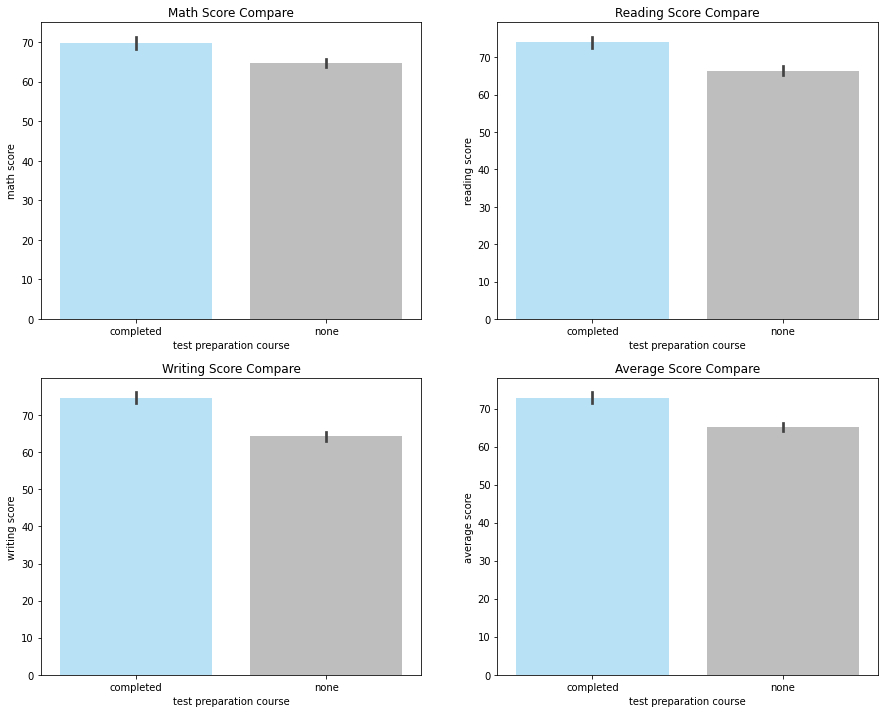

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f , axes = plt.subplots(2,2)
axes = axes.flatten()
f.set_size_inches(15,12)
colors = ['#AEE4FF','#bdbebd']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data=df,x='test preparation course',y='math score', ax=axes[0]).set(title='Math Score Compare')
sns.barplot(data=df,x='test preparation course',y='reading score', ax=axes[1]).set(title='Reading Score Compare')
sns.barplot(data=df,x='test preparation course',y='writing score', ax=axes[2]).set(title='Writing Score Compare')
sns.barplot(data=df,x='test preparation course',y='average score', ax=axes[3]).set(title='Average Score Compare')

# 미션3

점심식사 (lunch)를 하는 학생(standard)과 그렇지 않은 학생(free/reduced) 사이에 성적 추이를 분석해 보세요.

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000


In [ ]:
df.groupby('lunch').mean()

,math score,reading score,writing score,average score
lunch,,,,
free/reduced,58.505747,63.189655,60.925287,60.873563
standard,70.607362,72.104294,71.374233,71.361963


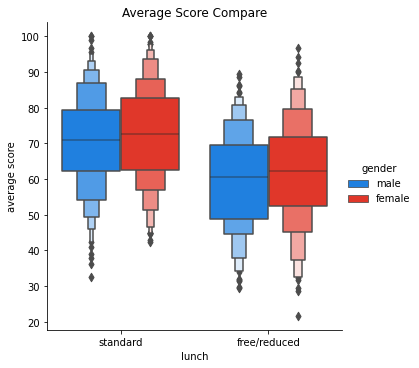

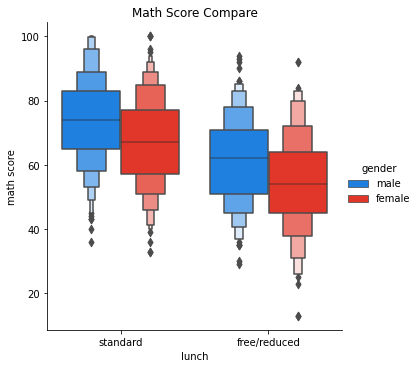

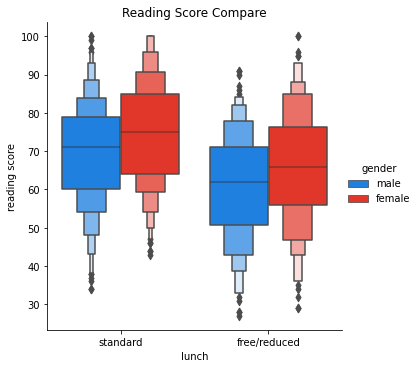

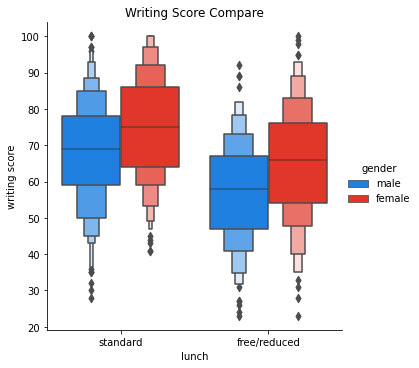

In [ ]:
colors = ['#0080ff','#ff1d0b']
sns.set_palette(sns.color_palette(colors))

sns.catplot(x='lunch', y='average score', hue='gender', kind='boxen', data=df,height=5).set(title='Average Score Compare')
sns.catplot(x='lunch', y='math score', hue='gender', kind='boxen', data=df,height=5).set(title='Math Score Compare')
sns.catplot(x='lunch', y='reading score', hue='gender', kind='boxen', data=df,height=5).set(title='Reading Score Compare')
sns.catplot(x='lunch', y='writing score', hue='gender', kind='boxen', data=df,height=5).set(title='Writing Score Compare')

# 미션4

부모의 교육 수준 (parental level of education)에 따른 학생의 성적을 분석해 보고 결론을 내려보세요.

In [ ]:
df.groupby('parental level of education').mean().sort_values(by=['average score'])

,math score,reading score,writing score,average score
parental level of education,,,,
some high school,60.701571,64.408377,62.539267,62.549738
high school,65.207921,67.400990,64.846535,65.818482
some college,65.297297,68.045045,66.734234,66.692192
associate's degree,69.536946,70.985222,70.113300,70.211823
bachelor's degree,71.491071,74.008929,74.410714,73.303571
master's degree,71.585714,75.428571,75.885714,74.300000


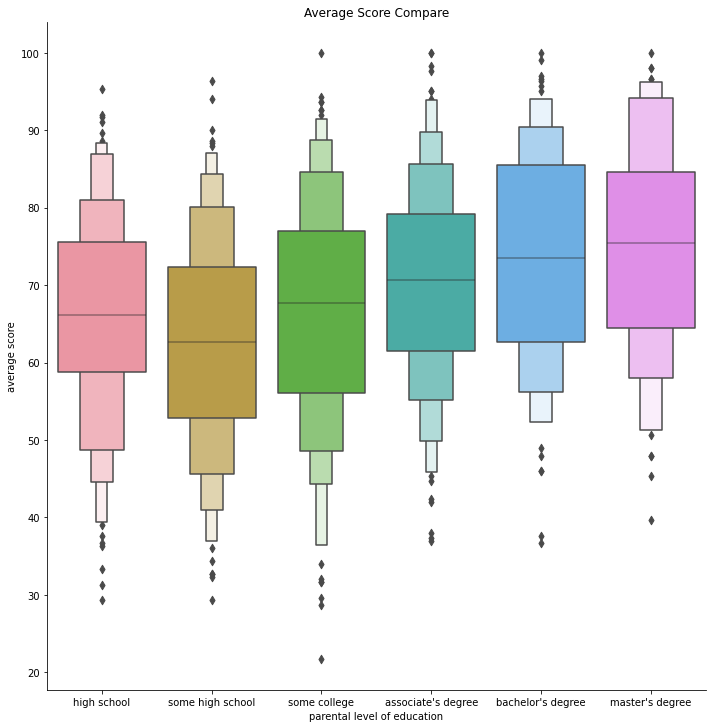

In [ ]:
sns.catplot(x='parental level of education', y='average score',  kind='boxen', data=df,height=10).set(title='Average Score Compare')